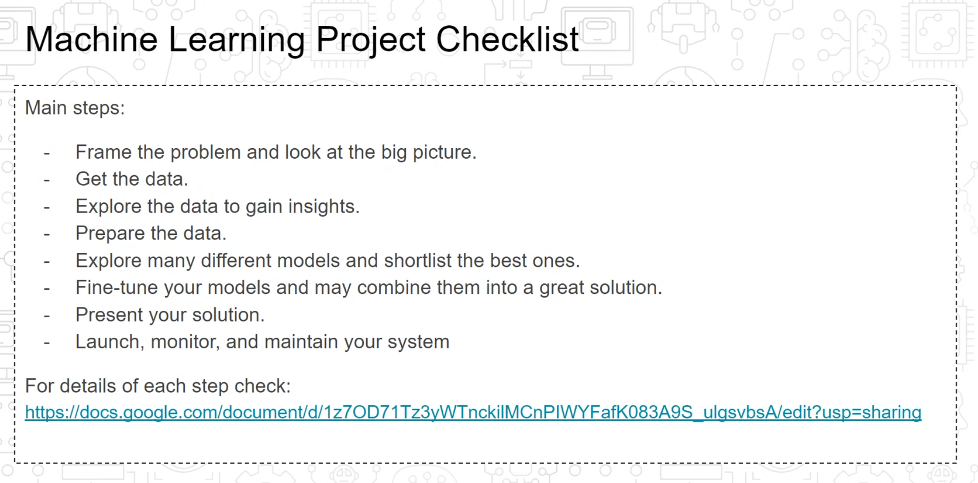

# 12. Machine learning techniques

In [44]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/ML_in_practice

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 378 (delta 74), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (378/378), 42.71 MiB | 16.85 MiB/s, done.
Resolving deltas: 100% (197/197), done.
/content/machine_learning_1/ML_in_practice/machine_learning_1/ML_in_practice


In [45]:
import random as rd
rd.seed(0)

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 12.1 Loading and exploring the dataset

First, we use pandas to load the dataset from a csv file.

In [47]:
# use pabdas to read './titanic.csv'
raw_data = pd.read_csv('./titanic.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Next, we can explore the dataset.

In [48]:
# Use pandas to examine some info of the dataset

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
# Use pandas to examine the description of the dataset
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


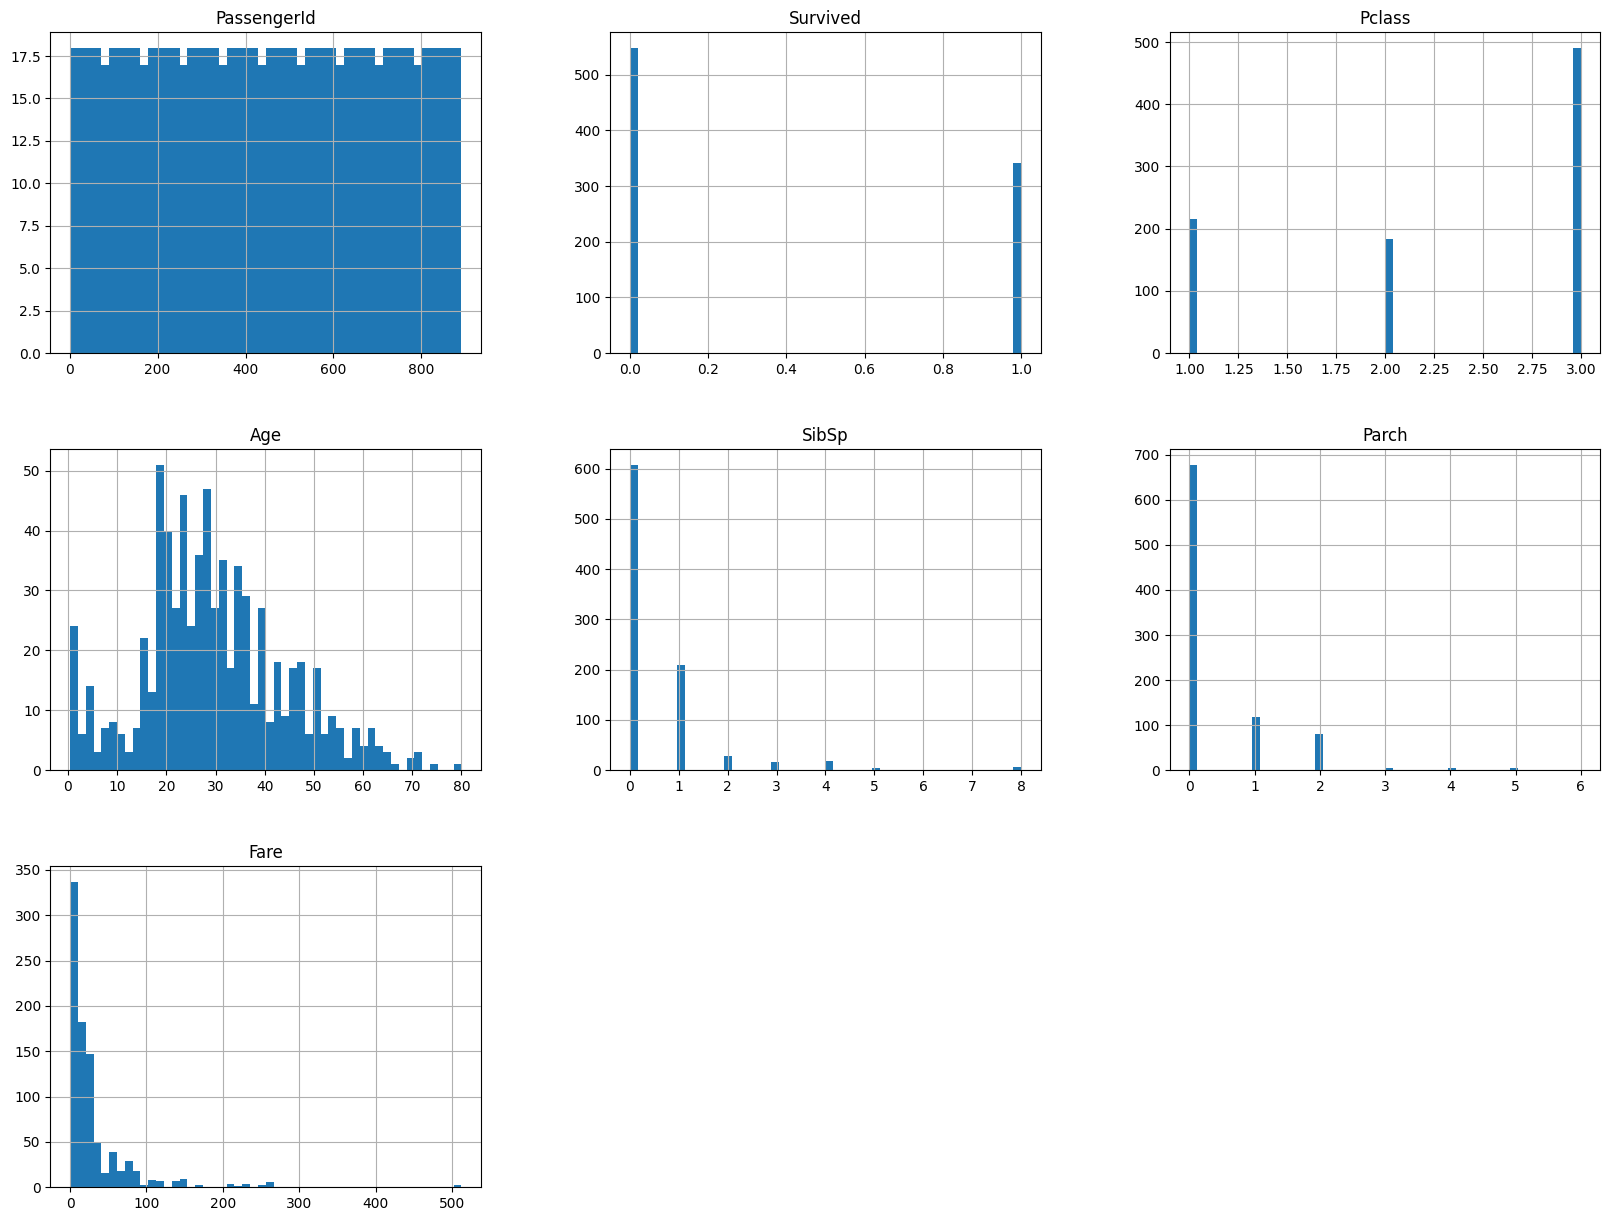

In [50]:
# Use pandas to examine the histograms of the dataset columns
raw_data.hist(bins=50,figsize=(20,15));
import seaborn as sns


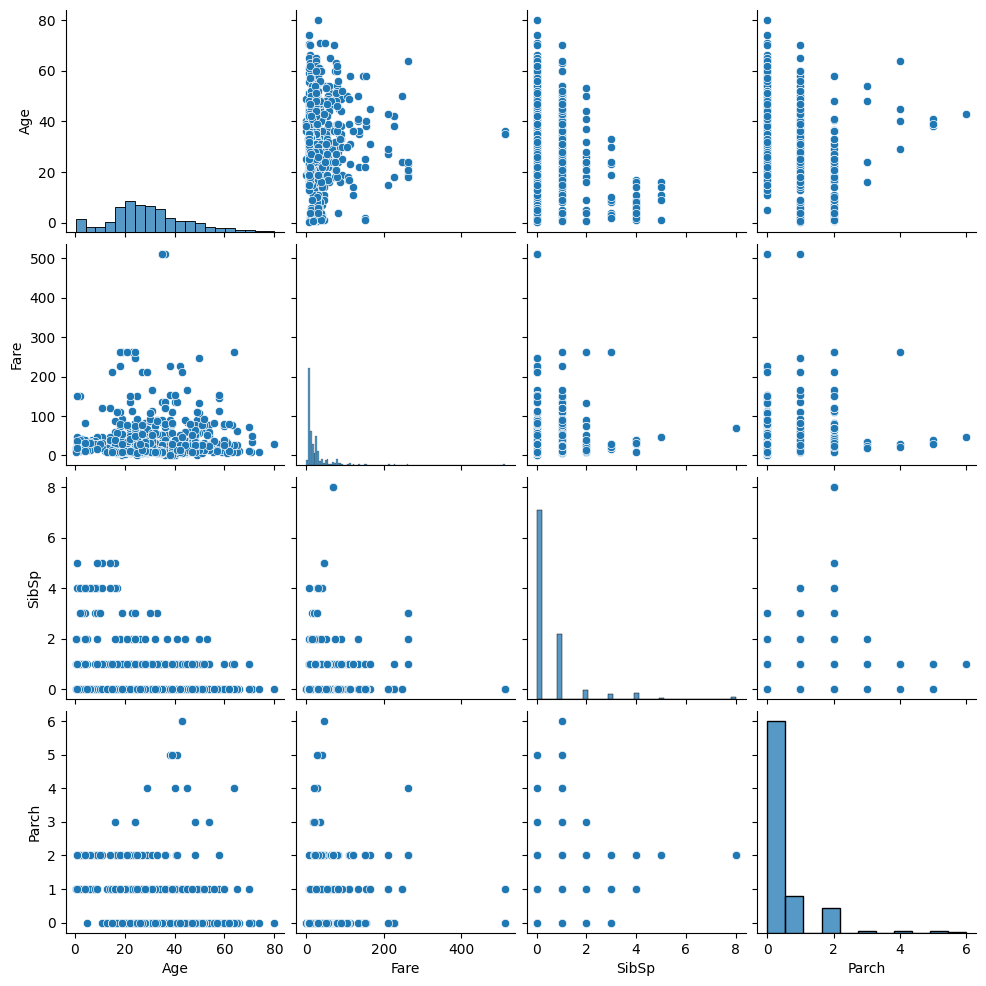

In [51]:
import seaborn as sns
sns.pairplot(raw_data[["Age", "Fare", "SibSp", "Parch"]]);#markers=['o', 's'],hue='Survived',diag_kind='kde'

In [52]:
# Use pandas to examine "survived" column (labels)
raw_data['Survived']


,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [53]:
# Use pandas to exanine more than one column at the same time ["Name", "Age"]

raw_data[['Name','Age']]


,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


In [54]:
# Use pandas to check how many passengers survived
print(raw_data.groupby('Survived').count())
print(raw_data.groupby('Survived').count().loc[1])
print(raw_data.groupby('Survived').count().loc[1,'PassengerId'])
print(raw_data.groupby('Survived').count().iloc[1,0])
# best solution
raw_data['Survived'].sum()

          PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Survived                                                                    
0                 549     549   549  549  424    549    549     549   549   
1                 342     342   342  342  290    342    342     342   342   

          Cabin  Embarked  
Survived                   
0            68       549  
1           136       340  
PassengerId    342
Pclass         342
Name           342
Sex            342
Age            290
SibSp          342
Parch          342
Ticket         342
Fare           342
Cabin          136
Embarked       340
Name: 1, dtype: int64
342
342


342

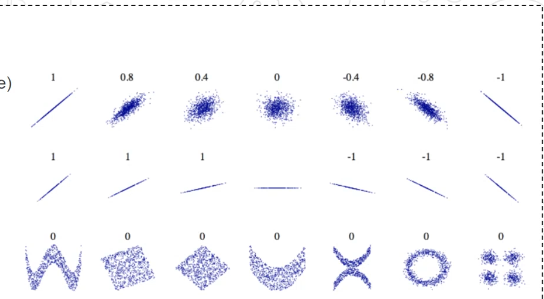

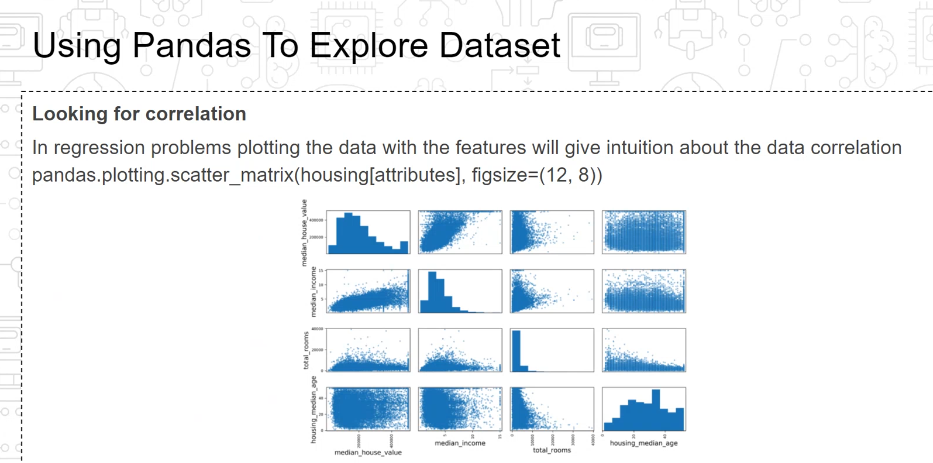

In [55]:
# cheek  liner corelation (btween survied and all other columns)

corr_mat=raw_data[['Survived','Age','Fare','Pclass','Parch','SibSp']].corr()
corr_mat['Survived'].sort_values(ascending=False)

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


[38.70967742 59.80392157 65.         56.28742515 61.79775281 58.33333333
 68.42105263 85.71428571]


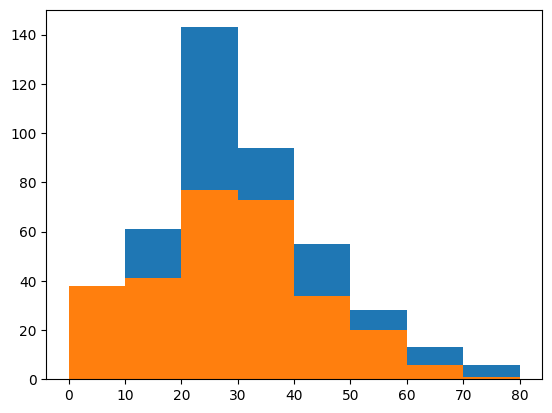

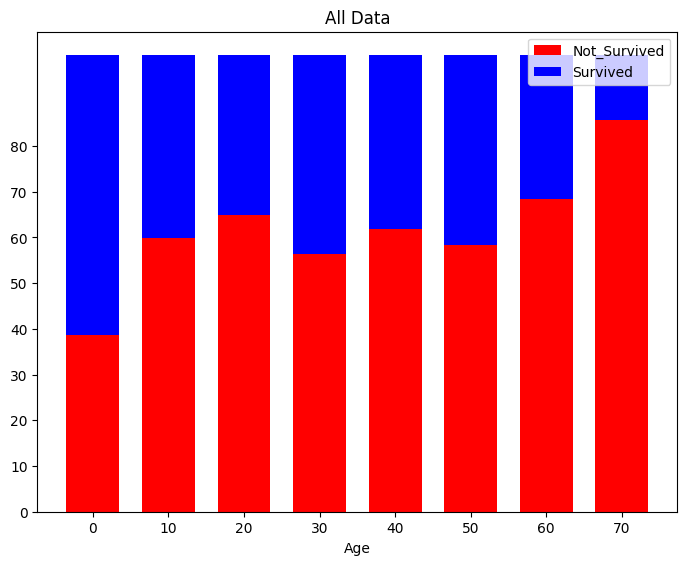

<ipython-input-56-df67f3774980>:30: RuntimeWarning: invalid value encountered in divide
  stacked_data = 100*values /values.sum(axis=0)


[36.66666667 24.44444444 27.77777778 16.66666667 31.25       11.11111111
  0.                 nan]


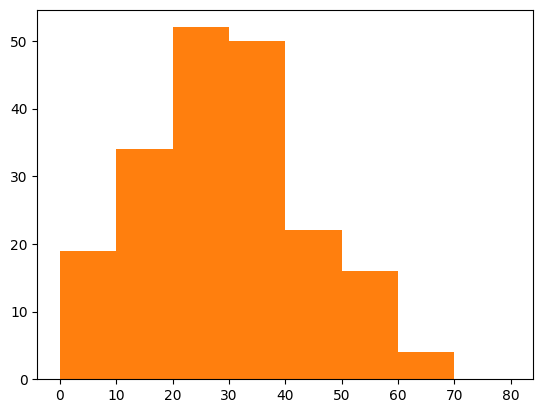

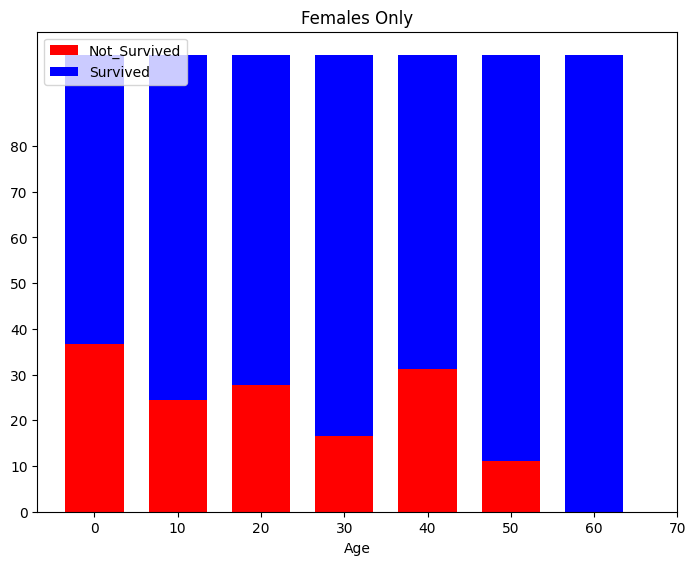

[40.625      87.71929825 83.10810811 78.5046729  78.94736842 86.66666667
 86.66666667 85.71428571]


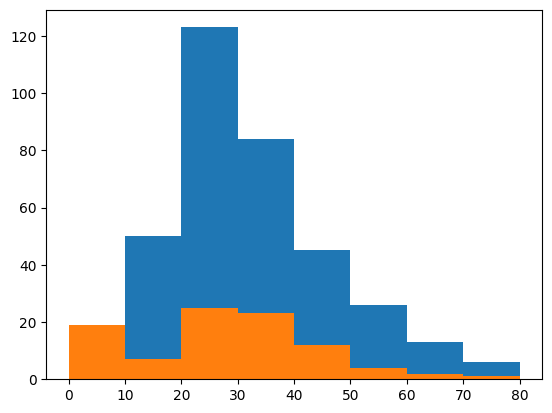

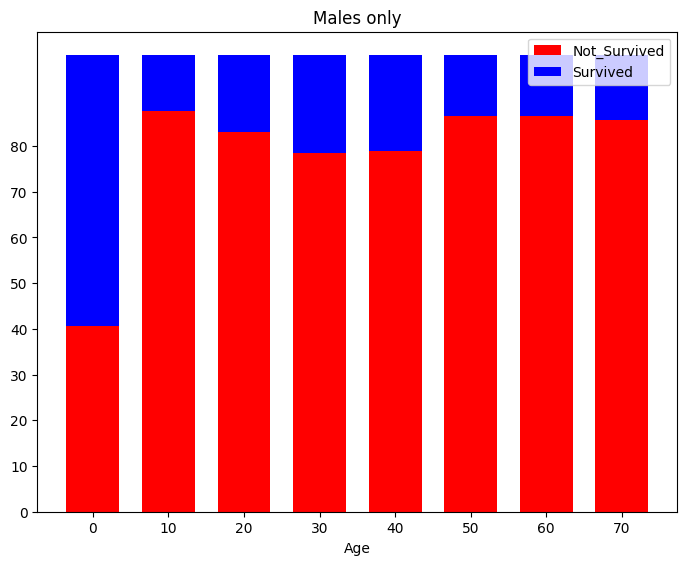

In [56]:
# visulaization
a=raw_data.where(raw_data["Survived"]==0)[["Age","Survived"]]
b=raw_data.where(raw_data["Survived"]==1)[["Age","Survived"]]
v1,b1,_=plt.hist(a["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N) # the x locations for the groups
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('All Data')
ax.set_xlabel('Age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'Survived'])
plt.show()


a=raw_data.loc[(raw_data["Survived"]==0) & (raw_data["Sex"]=="female"),["Age","Survived"]]
b=raw_data.loc[(raw_data["Survived"]==1) & (raw_data["Sex"]=="female"),["Age","Survived"]]
v1,b1,_=plt.hist(a["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N) # the x locations for the groups
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('Females Only')
ax.set_xlabel('Age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'Survived'])
plt.show()

a=raw_data.loc[(raw_data["Survived"]==0) & (raw_data["Sex"]=="male"),["Age","Survived"]]
b=raw_data.loc[(raw_data["Survived"]==1) & (raw_data["Sex"]=="male"),["Age","Survived"]]
v1,b1,_=plt.hist(a["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N) # the x locations for the groups
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('Males only')
ax.set_xlabel('Age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'Survived'])
plt.show()



## 12.2. Cleaning up the data

Now, let's look at how many columns have missing data

In [57]:
# use pandas to check missing data (NA(not available) values) for all the columns
raw_data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


The Cabin column is missing too many values to be useful. Let's drop it altogether.

In [58]:
# Use pandas to drop "Cabin" column
clean_data = raw_data.drop('Cabin',axis=1 )

In [59]:
clean_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Other columns such as Age or Embarked are missing some values, but they can still be useful.

For the age column, let's fill in the missing values with the median of all ages.

For the Embarked column, let's make a new category called 'U', for Unknown port of embarkment.

In [60]:
# get the median of age column using pandas
# use medain when there exsist outlier
# use mean  when data is normal dist
#use mode in catrgoral data
median_age = clean_data['Age'].median()

median_age

28.0

In [61]:
# use pandas to fill the na values in age column with the median age
clean_data["Age"] = clean_data["Age"].fillna(median_age)

In [62]:
# use pandas to fill the na values in embarked column with 'U'
#you can drop  raw as it small number
# the best sol fill with mode "must frqunt value"
clean_data["Embarked"] = clean_data["Embarked"].fillna('U')


In [63]:
mod=clean_data["Embarked"].mode()
clean_data["Embarked"] = clean_data["Embarked"].replace({'U':mod[0]})
clean_data["Embarked"]

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [64]:
clean_data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [65]:
# view 10 rows of the clean dataset

clean_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### 12.2.3 Saving our data for the future

In [66]:
# save the clean dataset to './myclean_titanic_data.csv'
clean_data.to_csv('./myclean_titanic_data.csv',index=None)

## 12.3 Manipulating the features

- One-hot encoding
- Binning
- Feature selection

### 12.3.1 One-hot encoding

In [67]:
preprocessed_data = pd.read_csv('clean_titanic_data.csv')
preprocessed_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


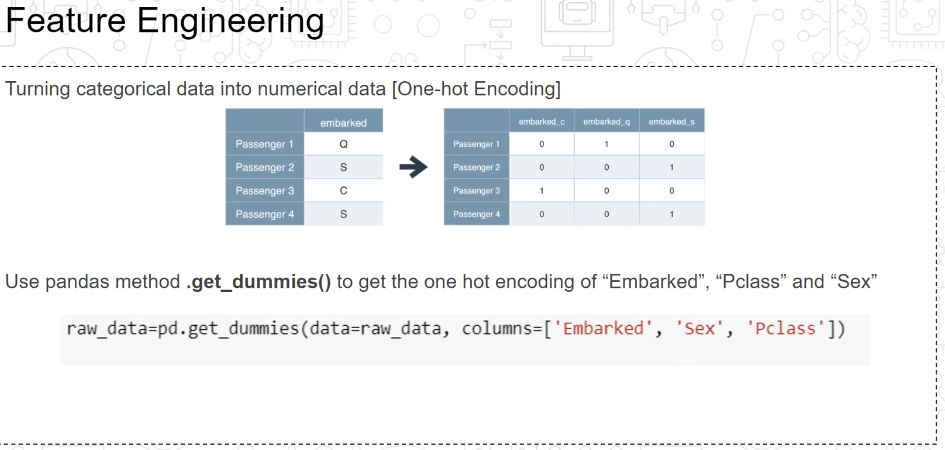

In [68]:
# Use pandas method .get_dummies() to get the one hot encoding of “embarked”, “pclass” and “gender”
preprocessed_data=pd.get_dummies(data=preprocessed_data,columns=['Embarked','Sex','Pclass'],dtype=int)

# Use pandas method .drop() to remove the old columns and method .concat() to add the new columns

preprocessed_data



,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,0,1,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,0,1,0,0,1,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,1,0,1,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,0,0,1,0,1,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0,0,0,0,1,1,0,0


In [69]:
preprocessed_data

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,0,1,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,0,1,0,0,1,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,1,0,1,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,0,0,1,0,1,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0,0,0,0,1,1,0,0


### 12.3.2 Binning

In [70]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
# Use .cut() method to make bins from the age column

categorized_age =pd.cut(preprocessed_data['Age'],bins=bins)
preprocessed_data['Categorized_age'] = categorized_age
preprocessed_data = preprocessed_data.drop(["Age"], axis=1)

preprocessed_data

,PassengerId,Survived,Name,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Categorized_age
0,1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0,0,1,0,0,1,0,0,1,"(20, 30]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,1,0,0,0,1,0,1,0,0,"(30, 40]"
2,3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0,0,1,0,1,0,0,0,1,"(20, 30]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,0,0,1,0,1,0,1,0,0,"(30, 40]"
4,5,0,"Allen, Mr. William Henry",0,0,373450,8.0500,0,0,1,0,0,1,0,0,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,0,211536,13.0000,0,0,1,0,0,1,0,1,0,"(20, 30]"
887,888,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,0,0,1,0,1,0,1,0,0,"(10, 20]"
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,0,0,1,0,1,0,0,0,1,"(20, 30]"
889,890,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,1,0,0,0,0,1,1,0,0,"(20, 30]"


In [71]:
# Use pandas method .get_dummies() to get the one hot encoding of “Categorized_age”
# Use pandas method .drop() to remove the old column and method .concat() to add the new columns

preprocessed_data=pd.get_dummies(data=preprocessed_data,columns=["Categorized_age"],dtype=int)

preprocessed_data

,PassengerId,Survived,Name,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,"Allen, Mr. William Henry",0,0,373450,8.0500,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,0,211536,13.0000,0,0,1,...,1,0,0,0,1,0,0,0,0,0
887,888,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,0,0,1,...,0,0,0,1,0,0,0,0,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,0,0,1,...,0,1,0,0,1,0,0,0,0,0
889,890,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### 12.3.4 Feature selection

In [72]:
# drop these columns['Name', 'Ticket', 'PassengerId']

preprocessed_data.drop(columns=['Name', 'Ticket', 'PassengerId'],inplace=True)

preprocessed_data.head()

,Survived,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,1,0,7.2500,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,1,1,0,71.2833,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,7.9250,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,1,1,0,53.1000,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,8.0500,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0


### 12.3.5 Saving for future use

In [73]:
preprocessed_data.to_csv('./mypreprocessed_titanic_data.csv', index=None)

# 12.4 Training models

In [74]:
data = pd.read_csv('./preprocessed_titanic_data.csv')
data.head()

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_C,Pclass_Q,Pclass_S,Pclass_U,...,"Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]",Pclass_1,Pclass_2,Pclass_3
0,0,1,0,7.2500,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,1,1,0,71.2833,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,7.9250,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,1,1,0,53.1000,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,8.0500,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


### 12.4.1 Features-labels split and train-validation split

In [75]:
# drop ["Survived"] column and save that to features
features =preprocessed_data.drop(columns=['Survived'])

# save the ["Survived"] column to labels
labels =preprocessed_data["Survived"]

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
# split data by 60% train ; use random_state=100
features_train, features_validation_test, labels_train, labels_validation_test =train_test_split(features,labels,test_size= .4,random_state=100)

In [78]:
# split test data by 50% validation and 50% test ; use random_state=100
features_validation, features_test, labels_validation, labels_test =train_test_split(features_validation_test,labels_validation_test,test_size= .5,random_state=100)

In [79]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

534
178
179
534
178
179


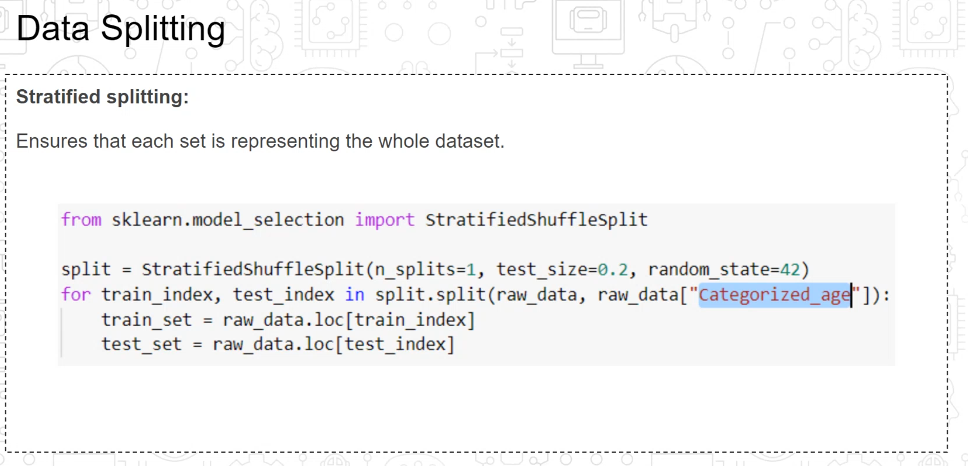

### 12.4.2 Training different models on our dataset

We'll train six models:
- Logistic regression (perceptron)
- Decision tree
- Support vector machine (SVM)
- RandomForestClassifier
- GradientBoostingClassifier
- AdaBoostClassifier

In [80]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression().fit(features_train,labels_train )

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
# Train decision tree model ; don't use any hyperparameter
from sklearn.tree import DecisionTreeClassifier

dt_model =DecisionTreeClassifier().fit(features_train,labels_train )

In [82]:
# Train SVM model ; don't use any hyperparameter
from sklearn.svm import SVC

svm_model =SVC().fit(features_train,labels_train )

In [83]:
# Train random forest model ; don't use any hyperparameter
from sklearn.ensemble import RandomForestClassifier

rf_model =RandomForestClassifier().fit(features_train,labels_train )

In [84]:
# Train gradient boosting model ; don't use any hyperparameter
from sklearn.ensemble import GradientBoostingClassifier

gb_model =GradientBoostingClassifier().fit(features_train,labels_train )

In [85]:
# Train Adaboost model ; don't use any hyperparameter
from sklearn.ensemble import AdaBoostClassifier

ab_model =AdaBoostClassifier().fit(features_train,labels_train )

### 12.4.3 Evaluating the models

#### Accuracy

In [86]:
# print accuracy=score of each model on validation data
print("Scores of the models")
print("Logistic regression:", lr_model.score(features_validation,labels_validation))
print("Decision tree:", dt_model.score(features_validation,labels_validation))
print("SVM:", svm_model.score(features_validation,labels_validation))
print("Random forest:",rf_model.score(features_validation,labels_validation) )
print("Gradient boosting:",gb_model.score(features_validation,labels_validation) )
print("AdaBoost:", ab_model.score(features_validation,labels_validation))

Scores of the models
Logistic regression: 0.7696629213483146
Decision tree: 0.7752808988764045
SVM: 0.6797752808988764
Random forest: 0.7865168539325843
Gradient boosting: 0.8146067415730337
AdaBoost: 0.7359550561797753


#### F1-score

In [87]:
# print F1-score of each model on validation data
from sklearn.metrics import f1_score

print("F1-scores of the models:")

y_pred=lr_model.predict(features_validation)
print("Logistic regression:",f1_score(y_pred,labels_validation))

y_pred=dt_model.predict(features_validation)
print("Decision tree:",f1_score(y_pred,labels_validation) )

y_pred=svm_model.predict(features_validation)
print("SVM:",f1_score(y_pred,labels_validation) )

y_pred=rf_model.predict(features_validation)
print("Random forest:", f1_score(y_pred,labels_validation))

y_pred=gb_model.predict(features_validation)
print("Gradient boosting:",f1_score(y_pred,labels_validation) )

y_pred=ab_model.predict(features_validation)
print("AdaBoost:", f1_score(y_pred,labels_validation))

F1-scores of the models:
Logistic regression: 0.6870229007633588
Decision tree: 0.696969696969697
SVM: 0.4
Random forest: 0.7205882352941176
Gradient boosting: 0.7441860465116279
AdaBoost: 0.6466165413533834


### 12.4.4 Testing the model

Finding the accuracy and the F1-score of the model in the testing set.

In [88]:
# print accuracy of gradient boost model on testing data
accurcy=gb_model.score(features_test,labels_test)
print(accurcy)


0.8324022346368715


In [90]:
# print F1-score of gradient boost model on testing data
y_pred=gb_model.predict(features_test)
f1_score(y_pred,labels_test)

0.8026315789473685

# 12.5 Grid search

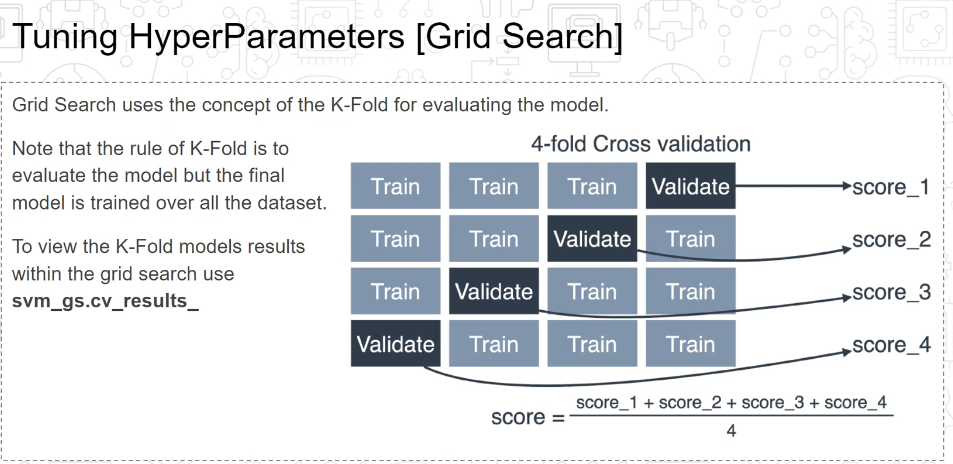

In [92]:
from sklearn.model_selection import GridSearchCV

In [97]:
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100]
                }
# use gridsearch to find the best hyperparameters
svm = SVC()
svm_gs =GridSearchCV( estimator=svm,param_grid=svm_parameters )
svm_gs.fit(features_train,labels_train )
# git the best model
svm_winner =svm_gs.best_estimator_

svm_winner.score(features_validation, labels_validation)

0.7191011235955056

In [98]:
svm_winner

SVC(C=10, gamma=0.01)

# 12.6 Cross validation

In [99]:
# print the k-fold cross validation output
svm_gs.cv_results_


{'mean_fit_time': array([0.00944028, 0.00896897, 0.00934496, 0.0119729 , 0.00937815,
        0.00800157, 0.00899582, 0.00994196, 0.01039886, 0.00995054,
        0.0090199 , 0.00967574, 0.01049795, 0.01086965, 0.01055341,
        0.00953956, 0.01030579, 0.01390262, 0.01203523, 0.01103182,
        0.01319876, 0.01591854, 0.01288681, 0.01283493, 0.01539183]),
 'std_fit_time': array([0.00227618, 0.00064456, 0.00022462, 0.00231469, 0.00035407,
        0.00017252, 0.00088872, 0.00023959, 0.00035071, 0.00011019,
        0.0005075 , 0.00084192, 0.00029855, 0.00014422, 0.00033784,
        0.00033983, 0.000572  , 0.00225543, 0.00065401, 0.00032048,
        0.00125468, 0.00180403, 0.00206793, 0.00118478, 0.00478246]),
 'mean_score_time': array([0.00390625, 0.00395598, 0.00413899, 0.00514512, 0.0041512 ,
        0.00366292, 0.00418739, 0.00444055, 0.00437326, 0.00464449,
        0.00390096, 0.00385132, 0.0044775 , 0.00443192, 0.00430512,
        0.00354848, 0.00356131, 0.00480652, 0.00421271, 0.00

# 12.7 Save the model

In [100]:
# use joblib to save the model
import joblib
joblib.dump(svm_winner,'my_model.pkl')
# to load model
my_model_loaded=joblib.load('my_model.pkl')


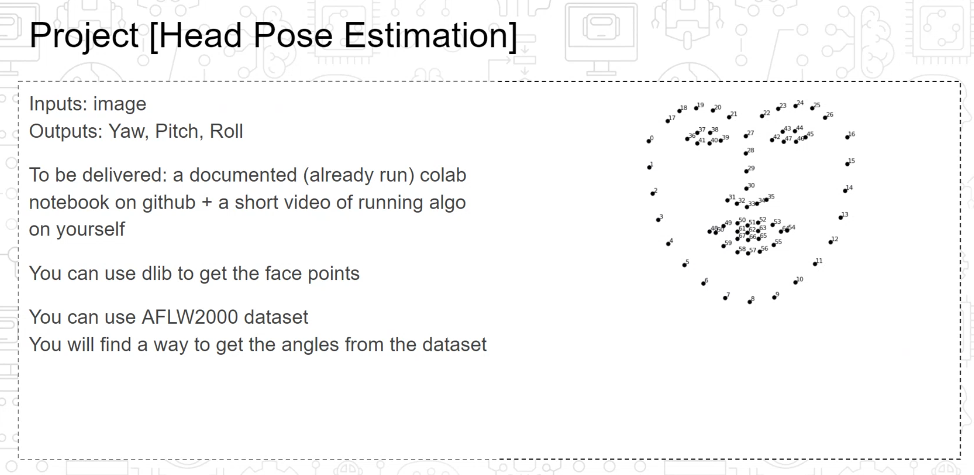

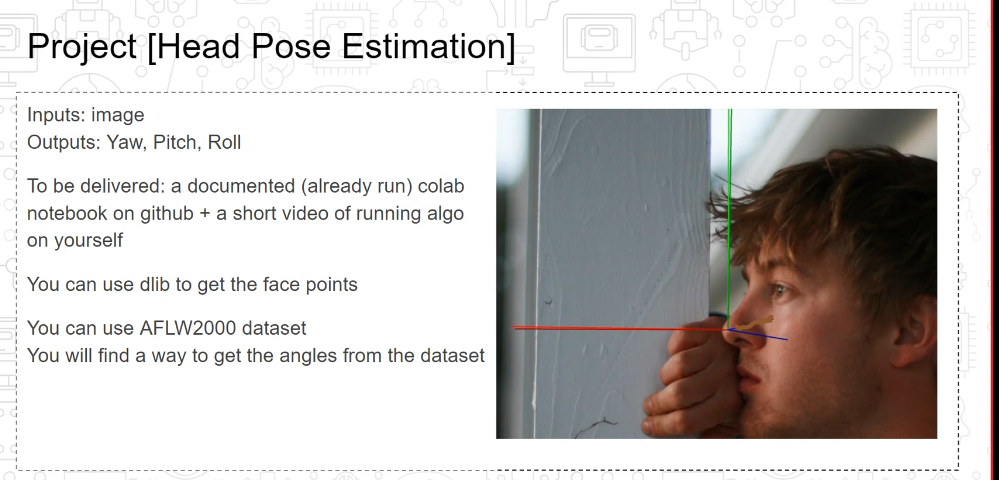